In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import time

df = pd.read_csv('../Datasets/dataset_TPV_sensors/hex/payloadHex.csv')
df = df[['InletPressure',
               'OutletPressure',
               'OutletTemperature',
               'InverterSpeed']]

In [2]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt

warnings.simplefilter('ignore')

from matplotlib.pyplot import figure

figure(figsize=(16, 4), dpi=80)


# Common code for display result
def show_graph(df1,df2,title):
    data = pd.concat([df1, df2])
    data.reset_index(inplace=True, drop=True)
    for col in data.columns:
        if col.lower().startswith('pred'):
            data[col].plot(label=col,linestyle="dotted")
        else:
            data[col].plot(label=col)
    plt.title(title)
    plt.legend()
    plt.show()

<Figure size 1280x320 with 0 Axes>

In [3]:
# def dow_sampling(data, down_sample_factor = 1):

#     # Define the down-sampling factor
    

#     # Downsample the data
#     down_sampled_data = data[::down_sample_factor]
    
#     return down_sampled_data

In [4]:
slice_train_test = 5000
train = df[:slice_train_test]
test = df[slice_train_test:9000]

In [5]:
from statsmodels.tsa.statespace.varmax import VARMAX
from random import random

def VARMA_model(train,test):
    # fit model
    model = VARMAX(train, order=(0, 1, 2))
    model_fit = model.fit(disp=False)
    # make prediction
    yhat = model_fit.forecast(steps=len(test))
    
    print(yhat.keys())
    
    return yhat

y_hat = VARMA_model(train, test)

/home/paim/anaconda3/envs/ocr_estacio/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Index(['InletPressure', 'OutletPressure', 'OutletTemperature',
       'InverterSpeed'],
      dtype='object')


Text(0.5, 1.0, 'Apply VARMA em PayloadHex')

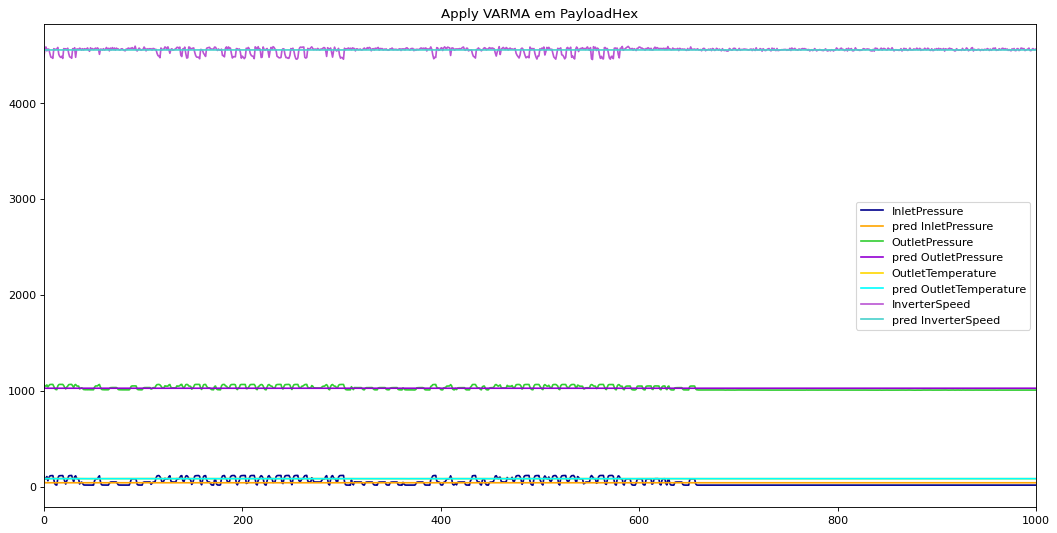

In [20]:
# 'InletPressure', 'OutletPressure', 'OutletTemperature', 'InverterSpeed'

figure(figsize=(16, 8), dpi=80)

plt.plot(test["InletPressure"].tolist(), color="darkblue", label = "InletPressure")
plt.plot(y_hat["InletPressure"].tolist(), color="orange", label = "pred InletPressure")

plt.plot(test["OutletPressure"].tolist(), color="limegreen", label = "OutletPressure")
plt.plot(y_hat["OutletPressure"].tolist(), color="darkviolet", label = "pred OutletPressure")

plt.plot(test["OutletTemperature"].tolist(), color="gold", label="OutletTemperature")
plt.plot(y_hat["OutletTemperature"].tolist(), color="aqua", label = "pred OutletTemperature")

plt.plot(test["InverterSpeed"].tolist(), color="mediumorchid", label = "InverterSpeed")
plt.plot(y_hat["InverterSpeed"].tolist(), color="mediumturquoise", label = "pred InverterSpeed")

plt.legend()

x_min = min(test["InverterSpeed"].tolist())
x_max = max(test["InverterSpeed"].tolist())

plt.xlim(0, 1000)

plt.title("Apply VARMA em PayloadHex")
#y_hat["OutletPressure"]
#y_hat["OutletTemperature"]
#y_hat["InverterSpeed"]

Text(0.5, 1.0, 'OutletPressure')

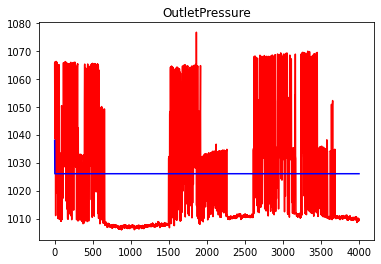

In [7]:
plt.plot(test["OutletPressure"].tolist(), color="red")
plt.plot(y_hat["OutletPressure"].tolist(), color="blue")
plt.title("OutletPressure")

Text(0.5, 1.0, 'OutletTemperature')

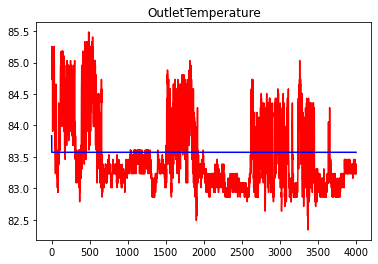

In [8]:
plt.plot(test["OutletTemperature"].tolist(), color="red")
plt.plot(y_hat["OutletTemperature"].tolist(), color="blue")
plt.title("OutletTemperature")

Text(0.5, 1.0, 'InverterSpeed')

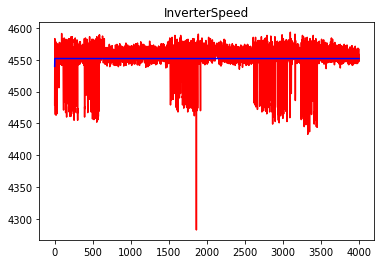

In [9]:
plt.plot(test["InverterSpeed"].tolist(), color="red")
plt.plot(y_hat["InverterSpeed"].tolist(), color="blue")
plt.title("InverterSpeed")